#  <span style="color:orange">Binary Classification Tutorial (CLF102) - Level Intermediate</span>

**Date Updated: Feb 25, 2020**

# 1.0 Objective of Tutorial
Welcome to Binary Classification Tutorial (#CLF102). This tutorial assumes that you have completed __[Binary Classification Tutorial - Level Beginner (#CLF101)](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__. If you haven't used PyCaret before and this is your first tutorial, we strongly recommend you to go back and progress through the beginner's tutorial to understand basics of working in PyCaret.

In this tutorial using `pycaret.classification` module we will learn:

* **Normalization:**  How to normalize and scale the dataset?
* **Transformation:**  How to apply transformations that makes data linear and approximately normal?
* **Ignore Low Variance:**  How to remove features with statistically insignificant variances to make experiment more efficient?
* **Remove Multi-collinearity:**  How to remove multi-collinearity from the dataset to boost performance of Linear algorithms?
* **Group Features:**  How to extract statistical information from related features in the dataset?
* **Bin Numeric Variables:**  How to bin numeric variables and transform numeric features into categorical using 'sturges' rule? 
* **Model Ensembling and Stacking:**  How to boost model performance using several ensembling techniques such as Bagging, Boosting, Soft/hard Voting and Generalized Stacking.
* **Tuning Hyperparameters of Ensemblers:**  How to tune hyperparameters of ensemblers? 
* **Model Calibration:**  How to calibrate probabilities of a classification model?
* **Save / Load Experiment:**  How to save/load an entire experiment?

Read Time : Approx 60 Minutes


## 1.1 Installing PyCaret
If you haven't installed PyCaret yet. Please follow the link to __[Beginner's Tutorial](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ for instruction on how to install pycaret.

## 1.2 Pre-Requisites
- Python 3.x
- Latest version of pycaret
- Internet connection to load data from pycaret's repository
- Completion of Binary Classification Tutorial (CLF101) - Level Beginner

## 1.3 For Google colab users:
If you are running this notebook on Google colab, below code of cells must be run at top of the notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


## 1.4 See also:
- __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__
- __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF103)_LevelExpert.ipynb)__

# 2.0 Brief overview of techniques covered in this tutorial
Before we practically get into execution of the techniques mentioned above in the Section 1 (Objective of Tutorial), it is important to understand what are these techniques and when to use them. More often than not most of these techniques will help linear and parametric algorithms, however it is no surprise to see performance gain in tree-based models. Below explanations are only brief and we recommend you to do extra reading to dive deeper to get more understanding of these techniques.

- **Normalization:** Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that the transformed values have helpful properties for machine learning. Many machine learning algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variance in the same order. If a particular feature in dataset has a variance that is larger from other features in order of magnitude, the model may not understand all features correctly and may perform poorly. For example, in the dataset we are using for this example, it contains `AGE` feature which ranges between 21 to 79 while other numeric features are in range of 10,000 to 1,000,000. __[Read more](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)__ <br/>
<br/>
- **Transformation:** While normalization transforms the range of data to eradicate the impact of magnitude in variance, transformation is more radical technique as it changes the shape of the distribution so that transformed data can be represented by normal or approximate normal distirbution. In general, you should transform the data if you're going to use algorithms that assumes normality or gaussian distribution. Some examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.) __[Read more](https://en.wikipedia.org/wiki/Power_transform)__<br/>
<br/>
- **Ignore Low Variance:** Datasets come sometimes with categorical features that take an unique value across samples. This kind of feature is not only non-informative and adds no value but are also sometimes harmful for few algorithms. Imagine a feature with only one unique value or few dominant unique values accross samples, they can be removed from the dataset by using ignore low variance feature in PyCaret. <br/>
<br/>
- **Multi-collinearity:** Multi-collinearity is a state of very high intercorrelations or inter-associations among the independent features in the dataset. It is therefore a type of disturbance in the data that is not handled well by machine learning models (mostly linear algorithms). Multi-collinearity may reduce overall coefficient of the model and cause unpredictable variance. This will lead to overfitting where the model may do great on known training set but will fail at unknown testing set. __[Read more](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf)__<br/>
<br/>
- **Group Features:** Sometimes dataset may contain features that are related at a sample level, for example in the `credit` dataset we are using it containts feature `BILL_AMT1 .. BILL_AMT6` which is related in a way that `BILL_AMT1` is amount of bill 1 month ago and `BILL_AMT6` is amount of bill 6 months ago. Such features can be used to extract additional features based on statistical properties of the distribution such as mean, median, variance, standard deviation etc. <br/>
<br/>
- **Bin Numeric Variables:** Binning or discretization is the process of transforming numerical variables into categorical features, An example would be Age variable. Age is a continious distribution of numeric value that can be discretize into intervals (10-20 years, 21-30 etc.). Binning may improve accuracy of the predictive models by reducing the noise or non-linearity in the data. PyCaret automatically determines the number and size of bins using Sturges rule.  __[Read more](https://www.vosesoftware.com/riskwiki/Sturgesrule.php)__<br/>
<br/>
- **Model Ensembling and Stacking:** Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different sample of training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data. The motivation for using ensemble models is to reduce the generalization error of the prediction. As long as the base models are diverse and independent, the prediction error of the model decreases when the ensemble approach is used. Two most common method in ensemble learning are `Bagging` and `Boosting`. Stacking is also a type of ensemble learning where predictions from multiple models are used as an input feature for a meta model that predicts the final outcome using input from base learners. __[Read more](https://blog.statsbot.co/ensemble-learning-d1dcd548e936)__<br/>
<br/>
- **Tuning Hyperparameters of Ensemblers:** Similar to hyperparameters of a machine learning model, we will also learn how to tune hyperparameter of an ensembler model.

# 3.0 Dataset for the Tutorial

For this tutorial we will be using the same dataset that was used in __[CLF101 - Beginner Tutorial.](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__

#### Dataset Acknowledgements:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ at the UCI Machine Learning Repository.

# 4.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using get_data function (This will require internet connection).

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit', profile=True)

Notice that when `profile` parameter is to `True`, it displays data profile for Exploratory Data Analysis. Several pre-processing steps as discussed in section 2 above is performed in this experiment based on this analysis. Let's summarize how this analysis have helped us making critical choices in pre-processing the data.

- **Missing Values:** There are no missing values in the data. However, we still need imputers in our pipeline just in case the new unseen data has missing values (not applicable in this case). When you execute `setup()` function, imputers are created and stored in pipeline automatically. By default, it uses mean imputer for numeric values and constant imputer for categorical but can be changed using `numeric_imputation` and `categorical_imputation` parameter in `setup()`. <br/>
<br/>
- **Multicollinearity:** There are high correlations between several `BILL_AMT1 ... BIL_AMT6` which introduces multicollinearity in the data. We will remove multi-collinearity by using `remove_multicollinearity` and `multicollinearity_threshold` parameter in setup. <br/>
<br/>
- **Data Scale / Range:** Notice that how the scale / range of numeric features are different. For example feature `AGE` ranges between 21 to 79 and `BILL_AMT1` ranges from -165,580 to 964,511. This may cause problem for algorithms that assumes that all features have variance in the same order. In this case, order of magnitude in change for `BILL_AMT1` is widely different than `AGE`. We will deal with this problem by using `normalize` parameter in setup. <br/>
<br/>
- **Distribution of Feature Space:** Numeric features are not normally distributed. Look at the distribution of `LIMIT_BAL`, `BILL_AMT1` and `PAY_AMT1 ... PAY_AMT6`. Few features are also highly skewed for e.g. `PAY_AMT1`.  This may cause problem for algorithms that assumes normal or approximate normal distribution of the data for example Logistic Regression, Linear Discriminant Analysis (LDA) and Naive Bayes.  We will deal with this problem by using `transformation` parameter in setup. <br/>
<br/>
- **Group Features:** From the data description we know certain features are related with each other. For example `BILL_AMT1 ... BILL_AMT6` is related. Similarly, `PAY_AMT1 ... PAY_AMT6` is related. We will use `group_features` parameter in setup to extract statistical information from these features.  <br/>
<br/>
- **Bin Numeric Features:** Looking at the correlation between numeric features with target variable, we see a very weak relation of `AGE` and `LIMIT_BAL` with target variable. We will use `bin_numeric_features` parameter to remove the noise from these variables. This may help linear algorithms. <br/>

In [2]:
#check the shape of data
dataset.shape

(24000, 24)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 1200 rows are taken out from original dataset to be used for predictions. This should not be confused with train/test split. This split is performed to simulate real life scenario. Another way to think about this is that these 1200 records were not available at the time when machine learning experiment was performed.

In [3]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions (1200, 24)


# 6.0 Setting up Environment in PyCaret

In previous tutorial __[Binary Classification (#CLF101) - Level Beginner](BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we have learned how to initializes the environment in pycaret using `setup()`. You would remember that we have not passed any additional parameters in our last example as we didn't performed any pre-processing (other than those that are imperative for machine learning experiments and they are performed automatically by PyCaret).  In this example we will take it to the next level by customizing the pre-processing pipeline using `setup()`. Let's see how to implement all the steps discussed in section 4 above.

In [4]:
from pycaret.classification import *

In [5]:
exp_clf102 = setup(data = data, target = 'default', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]) 

 
Setup Succesfully Completed!


Note that it's the same setup grid that was shown in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__. The only difference here is the customization that we have performed in `setup()` is now set to `True`. Also notice that `session_id` is same `123` as beginner's level, which means effect of randomization is completely isolated. Any improvements we see in this experiment is solely due to the pre-processing steps taken in `setup()` or any other modeling techniques we use in later sections of this tutorial.

# 7.0 Comparing All Models

Similar to __[Binary Classification Tutorial (#CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we will also begin this tutorial with `compare_models()`. We will then compare the below results with the last experiment.

In [6]:
compare_models()

For the purpose of comparison we will use `AUC` this time. Notice that how drastically few algorithms have improved after we have performed few pre-processing steps in `setup()`. 
- Logistic Regression AUC improved from `0.6508` to `0.7804`
- Naives Bayes AUC improved from `0.6457` to `0.7530`
- K Nearest Neighbors AUC improved from `0.6099` to `0.7005`

To see results for all the models from previous tutorial refer to Section 7 in __[Binary Classification Tutorial (#CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__.

# 8.0 Create a Model

In previous tutorial __[Binary Classification (#CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we have learned how to create a model using `create_model()` function. Now we will learn about few other parameters in `create_model()` that may come handy sometimes. In this section of the tutorial, we will create all models using 5 fold stratified cross validation, notice how `fold` parameter is passed inside `create_model()` to achieve this.

### 8.1 Create Model (change fold to 5)

In [7]:
dt = create_model('dt', fold = 5)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7278  0.6195  0.4193  0.3921  0.4052  0.2289
1       0.7334  0.6230  0.4221  0.4022  0.4119  0.2396
2       0.7346  0.6231  0.4221  0.4043  0.4130  0.2417
3       0.7350  0.6143  0.3980  0.4003  0.3991  0.2291
4       0.7258  0.6234  0.4391  0.3929  0.4147  0.2364
Mean    0.7313  0.6207  0.4201  0.3983  0.4088  0.2352
SD      0.0038  0.0035  0.0131  0.0050  0.0058  0.0053

### 8.2 Create Model (round to 2 decimals points)

In [8]:
dt = create_model('dt', fold = 5, round = 2)

Accuracy   AUC  Recall  Prec.    F1  Kappa
0         0.73  0.62    0.42   0.39  0.41   0.23
1         0.73  0.62    0.42   0.40  0.41   0.24
2         0.73  0.62    0.42   0.40  0.41   0.24
3         0.73  0.61    0.40   0.40  0.40   0.23
4         0.73  0.62    0.44   0.39  0.41   0.24
Mean      0.73  0.62    0.42   0.40  0.41   0.24
SD        0.00  0.00    0.01   0.00  0.01   0.01

Notice how passing `round` parameter inside `create_model()` has rounded the evaluation metrics to 2 decimals. The score grid printed in 8.1 and 8.2 is exactly similar except that scores in 8.2 is rounded.

# 9.0 Tune a Model

In previous tutorial __[Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we have learned how to automatically tune hyperparameters of a model using pre-defined grids. In this tutorial we will introduce the use of `optimize` parameter in `tune_model()`. Optimize parameter can be thought of as an objective function. By default, in `pycaret.classification` all hyperparameter tuning is set to optimize `Accuracy` which can be changed using `optimize` parameter. See the example below:

In [9]:
tuned_rf = tune_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8315  0.7803  0.3853  0.7234  0.5028  0.4125
1       0.8208  0.7904  0.3484  0.6872  0.4624  0.3684
2       0.8208  0.8165  0.3938  0.6588  0.4929  0.3923
3       0.8233  0.7691  0.3569  0.6961  0.4719  0.3788
4       0.8158  0.7721  0.3484  0.6578  0.4556  0.3571
5       0.8127  0.7825  0.3314  0.6500  0.4390  0.3405
6       0.8133  0.7639  0.3484  0.6440  0.4522  0.3515
7       0.8340  0.7871  0.3711  0.7529  0.4972  0.4112
8       0.8214  0.7657  0.3569  0.6848  0.4693  0.3745
9       0.8107  0.7839  0.3513  0.6294  0.4509  0.3475
Mean    0.8204  0.7811  0.3592  0.6784  0.4694  0.3734
SD      0.0074  0.0146  0.0179  0.0363  0.0206  0.0242

In [10]:
tuned_rf2 = tune_model('rf', optimize = 'AUC')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8271  0.7825  0.3541  0.7225  0.4753  0.3859
1       0.8227  0.7973  0.3399  0.7059  0.4589  0.3680
2       0.8227  0.8200  0.3739  0.6804  0.4826  0.3864
3       0.8202  0.7692  0.3399  0.6897  0.4554  0.3623
4       0.8208  0.7755  0.3371  0.6959  0.4542  0.3621
5       0.8170  0.7892  0.3343  0.6743  0.4470  0.3520
6       0.8152  0.7548  0.3286  0.6667  0.4402  0.3445
7       0.8283  0.7893  0.3428  0.7423  0.4690  0.3827
8       0.8208  0.7601  0.3484  0.6872  0.4624  0.3684
9       0.8125  0.7808  0.3513  0.6392  0.4534  0.3516
Mean    0.8207  0.7819  0.3450  0.6904  0.4598  0.3664
SD      0.0047  0.0179  0.0121  0.0275  0.0122  0.0141

Notice that how the `optimize` parameter used in tuning Random Forest Classifier resulted in two different models. In `tuned_rf` where no optimize parameter was defined, it uses default function `Accuracy` to optimize and resulted in AUC of `0.7811`. In `tuned_rf2` we set `optimize` parameter to `AUC`, it resulted in AUC of `0.7819`. Notice the differences between hyperparameters of `tuned_rf` and `tuned_rf2` below:

In [11]:
#tuned_rf optimize parameter default to 'Accuracy'
plot_model(tuned_rf, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                         0
class_weight                   None
criterion                   entropy
max_depth                        20
max_features                   sqrt
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  4
min_samples_split                 5
min_weight_fraction_leaf          0
n_estimators                     50
n_jobs                         None
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [12]:
#tuned_rf optimize parameter set to 'AUC'
plot_model(tuned_rf2, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                         0
class_weight                   None
criterion                      gini
max_depth                        10
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  2
min_samples_split                10
min_weight_fraction_leaf          0
n_estimators                     70
n_jobs                         None
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

___

# 10.0 Ensemble a Model

Another common technique to improve performance of models is ensembling. Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. There are various techniques of ensembling that we will cover in this section. In order to ensemble models using `Bagging` or `Boosting` technique __[(Read More)](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)__, we use `ensemble_model()` function in PyCaret. This function ensembles the trained base estimator using the method defined in `method` parameter.

In [13]:
# lets create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7237  0.6136  0.4164  0.3848  0.4000  0.2209
1       0.7331  0.6260  0.4249  0.4021  0.4132  0.2406
2       0.7318  0.6277  0.4391  0.4026  0.4201  0.2461
3       0.7262  0.6193  0.4249  0.3906  0.4071  0.2295
4       0.7299  0.6050  0.3796  0.3873  0.3834  0.2105
5       0.7456  0.6427  0.4589  0.4297  0.4438  0.2792
6       0.7206  0.6201  0.4419  0.3852  0.4116  0.2295
7       0.7425  0.6319  0.4334  0.4203  0.4268  0.2608
8       0.7375  0.6202  0.4079  0.4068  0.4074  0.2387
9       0.7216  0.6184  0.4306  0.3848  0.4064  0.2253
Mean    0.7312  0.6225  0.4258  0.3994  0.4120  0.2381
SD      0.0082  0.0098  0.0204  0.0151  0.0153  0.0191

### 10.1 Bagging

In [14]:
bagged_dt = ensemble_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8114  0.7423  0.3683  0.6250  0.4635  0.3582
1       0.8064  0.7318  0.3371  0.6134  0.4351  0.3300
2       0.8183  0.7599  0.4023  0.6425  0.4948  0.3911
3       0.8001  0.7181  0.3258  0.5867  0.4189  0.3100
4       0.8133  0.7249  0.3428  0.6471  0.4481  0.3483
5       0.8133  0.7367  0.3541  0.6410  0.4562  0.3546
6       0.7964  0.7171  0.3088  0.5737  0.4015  0.2919
7       0.8170  0.7497  0.3513  0.6631  0.4593  0.3614
8       0.8139  0.7240  0.3626  0.6400  0.4629  0.3606
9       0.8100  0.7450  0.3683  0.6190  0.4618  0.3554
Mean    0.8100  0.7349  0.3521  0.6252  0.4502  0.3461
SD      0.0067  0.0135  0.0246  0.0264  0.0248  0.0270

In [15]:
# check the parameter of bagged_dt
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

Notice how ensembling has improved the `AUC` from `0.6225` to `0.7349`. In above example we have used all default parameters of `ensemble_model()` which uses `Bagging` method. Let's try `Boosting` by changing the `method` parameter in `ensemble_model()`. See example below: 

### 10.2 Boosting

In [16]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7838  0.7071  0.3909  0.5149  0.4444  0.3134
1       0.7782  0.6808  0.3286  0.4979  0.3959  0.2670
2       0.7782  0.7186  0.3994  0.4982  0.4434  0.3070
3       0.7826  0.6889  0.3768  0.5115  0.4339  0.3032
4       0.7782  0.6521  0.2861  0.4975  0.3633  0.2407
5       0.7832  0.6959  0.3966  0.5128  0.4473  0.3152
6       0.7801  0.6881  0.3626  0.5039  0.4217  0.2904
7       0.7845  0.6634  0.3598  0.5184  0.4247  0.2974
8       0.7726  0.6889  0.4023  0.4830  0.4389  0.2978
9       0.7762  0.7112  0.3626  0.4923  0.4176  0.2830
Mean    0.7797  0.6895  0.3666  0.5031  0.4231  0.2915
SD      0.0036  0.0196  0.0346  0.0107  0.0248  0.0218

Notice how easy it is to ensemble models in PyCaret. Just by changing `method` parameter you can do Bagging or Boosting which otherwise would have taken multiple lines of code. Note that `ensemble_model()` by default build `10` estimators, however, this can be changed using `n_estimators` parameter inside `ensemble_model()`. Increase `n_estimators` sometimes improves the result. See an example below:

In [17]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8214  0.7588  0.3966  0.6604  0.4956  0.3952
1       0.8208  0.7634  0.3683  0.6736  0.4762  0.3791
2       0.8246  0.7859  0.4164  0.6652  0.5122  0.4121
3       0.8108  0.7401  0.3626  0.6244  0.4588  0.3538
4       0.8145  0.7575  0.3626  0.6432  0.4638  0.3620
5       0.8264  0.7689  0.3938  0.6881  0.5009  0.4051
6       0.8133  0.7348  0.3768  0.6303  0.4716  0.3669
7       0.8258  0.7673  0.3881  0.6884  0.4964  0.4008
8       0.8170  0.7477  0.3739  0.6502  0.4748  0.3737
9       0.8176  0.7611  0.4108  0.6360  0.4991  0.3939
Mean    0.8192  0.7585  0.3850  0.6560  0.4849  0.3842
SD      0.0052  0.0141  0.0183  0.0218  0.0171  0.0189

Notice how increasing the n_estimators parameter has improved the result. AUC in bagged_dt2 where `n_estimators = 50` improved to `0.7585` from `0.7349` in bagged_dt where n_estimators uses default value of `10`. You can also use `tune_model()` function to automatically tune `n_estimators` parameter of ensemble. See example below in which we are tuning Decision Tree along with `Bagging` parameters of Ensembled Decision Tree.

In [18]:
tuned_bagged_dt = tune_model('dt', ensemble = True, method='Bagging')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8233  0.7783  0.3371  0.7126  0.4577  0.3679
1       0.8227  0.7927  0.3484  0.6989  0.4650  0.3727
2       0.8195  0.8145  0.3541  0.6757  0.4647  0.3686
3       0.8214  0.7664  0.3541  0.6868  0.4673  0.3729
4       0.8264  0.7761  0.3569  0.7159  0.4764  0.3860
5       0.8252  0.7894  0.3513  0.7126  0.4706  0.3800
6       0.8145  0.7501  0.3201  0.6686  0.4330  0.3382
7       0.8289  0.7838  0.3343  0.7564  0.4637  0.3795
8       0.8183  0.7569  0.3314  0.6842  0.4466  0.3532
9       0.8144  0.7741  0.3484  0.6508  0.4539  0.3542
Mean    0.8215  0.7782  0.3436  0.6963  0.4599  0.3673
SD      0.0046  0.0176  0.0115  0.0283  0.0120  0.0139

In [19]:
# check the parameters of tuned Decision Tree with bagging
print(tuned_bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=6,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
    

Notice that `tuned_bagged_dt` is a Decision Tree wrapped inside a `BaggingClassifier`. Our first bagging ensemble with default values stored in `bagged_dt` resulted in AUC of `0.7349` which was improved to `0.7585` when we increased the `n_estimators` parameter to `50`. When we have tuned Decision Tree with `ensemble = True` inside `tune_model()` function, our final AUC for Tuned Ensembled Decision Tree is `0.7782`.

### 10.3 Blending

Blending is another common way to use ensembling technique in PyCaret. It uses predictions from multiple models to generate final prediction using voting / majority consensus from all the models passed in `estimator_list` parameter. If no list is passed, by default PyCaret uses all the models available in model library. `method` parameter can be used to define type of voting. When method is set to `hard`, it uses labels for majority rule voting. When method is set to `soft` it uses sum of predicted probabilities instead of label. Let's see an example below:

In [20]:
blend_hard = blend_models()

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.8252  0.0  0.3683  0.6989  0.4824  0.3891
1       0.8246  0.0  0.3456  0.7135  0.4656  0.3755
2       0.8233  0.0  0.3796  0.6802  0.4873  0.3907
3       0.8177  0.0  0.3484  0.6685  0.4581  0.3613
4       0.8264  0.0  0.3484  0.7235  0.4704  0.3814
5       0.8239  0.0  0.3569  0.7000  0.4728  0.3802
6       0.8183  0.0  0.3399  0.6780  0.4528  0.3580
7       0.8271  0.0  0.3484  0.7278  0.4713  0.3829
8       0.8214  0.0  0.3484  0.6910  0.4633  0.3698
9       0.8176  0.0  0.3654  0.6582  0.4699  0.3705
Mean    0.8225  0.0  0.3550  0.6940  0.4694  0.3759
SD      0.0034  0.0  0.0118  0.0220  0.0098  0.0105

Now that we have created a Voting Classifier using `blend_models()` function. The model stored in variable `blend_hard` is just like any other model that you would create using `create_model()` or `tune_model()`. You can use this model for prediction on unseen data using `predict_model()` in the same way you would use any other model. Notice that since we didn't pass the list of specific models for voting, it by default uses all the models in model library. 

You may have noticed that `AUC` is zero for all folds. This is because `method` parameter is set to `hard` which only uses labels (1 or 0) for predictions and hence no AUC is calculated. To change this you can use `method` parameter inside `blend_models()`. See example below:

In [21]:
blend_soft = blend_models(method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8227  0.7735  0.4108  0.6591  0.5061  0.4051
1       0.8221  0.7894  0.3229  0.7170  0.4453  0.3570
2       0.8227  0.8034  0.4363  0.6471  0.5212  0.4174
3       0.8183  0.7643  0.3229  0.6909  0.4402  0.3483
4       0.8233  0.7652  0.3144  0.7351  0.4405  0.3550
5       0.8258  0.7893  0.3456  0.7219  0.4674  0.3784
6       0.8177  0.7607  0.3229  0.6867  0.4393  0.3469
7       0.8258  0.7900  0.3541  0.7143  0.4735  0.3830
8       0.8208  0.7609  0.3314  0.7006  0.4500  0.3589
9       0.8113  0.7657  0.3428  0.6368  0.4457  0.3441
Mean    0.8210  0.7763  0.3504  0.6910  0.4629  0.3694
SD      0.0041  0.0146  0.0388  0.0318  0.0278  0.0243

Notice that results are not much different. Both the examples above uses all the models in model library to create Voting Classifier. Now we will create specific models using `create_model()` and use them inside `blend_models()` to create Voting Classifier of hand picked models passed in `estimator_list` parameter. See example below:

In [22]:
"""
we will create 4 specific models to be passed into blend_models().
Note that verbose is set to False to avoid printing score grid of individual models.
"""

gbc = create_model('gbc', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [23]:
blend_specific_soft = blend_models(estimator_list = [gbc,dt,lightgbm,xgboost], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8127  0.7664  0.3853  0.6239  0.4764  0.3700
1       0.8145  0.7793  0.3768  0.6364  0.4733  0.3696
2       0.8145  0.8050  0.4108  0.6223  0.4949  0.3871
3       0.8127  0.7565  0.3711  0.6298  0.4670  0.3625
4       0.8189  0.7615  0.3598  0.6684  0.4678  0.3703
5       0.8170  0.7838  0.3853  0.6445  0.4823  0.3796
6       0.8139  0.7537  0.3938  0.6261  0.4835  0.3771
7       0.8289  0.7808  0.3853  0.7083  0.4991  0.4066
8       0.8158  0.7483  0.3768  0.6425  0.4750  0.3724
9       0.8094  0.7636  0.3853  0.6099  0.4722  0.3631
Mean    0.8158  0.7699  0.3830  0.6412  0.4791  0.3758
SD      0.0050  0.0163  0.0129  0.0270  0.0103  0.0124

In [24]:
blend_specific_hard = blend_models(estimator_list = [gbc,dt,lightgbm,xgboost], method = 'hard')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.8308  0.0  0.3683  0.7345  0.4906  0.4023
1       0.8252  0.0  0.3484  0.7151  0.4686  0.3785
2       0.8214  0.0  0.3626  0.6809  0.4732  0.3775
3       0.8221  0.0  0.3541  0.6906  0.4682  0.3744
4       0.8271  0.0  0.3513  0.7251  0.4733  0.3844
5       0.8252  0.0  0.3626  0.7033  0.4785  0.3861
6       0.8221  0.0  0.3513  0.6927  0.4662  0.3728
7       0.8315  0.0  0.3541  0.7530  0.4817  0.3963
8       0.8183  0.0  0.3286  0.6864  0.4444  0.3516
9       0.8169  0.0  0.3683  0.6533  0.4710  0.3706
Mean    0.8240  0.0  0.3550  0.7035  0.4716  0.3794
SD      0.0046  0.0  0.0111  0.0276  0.0114  0.0134

Notice that Accuracy using `hard` method has improved to `0.8240` in blend_specific_hard from `0.8158` in blend_specific_soft. Which `method` and `models` to use in blending depends on the statistical properties of the dataset and experimenting with different models and method is the best way to find out which blender will work best on the specific problem.

### 10.4 Stacking

Stacking is another popular yet less commonly implemented technique of ensembling due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. The another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the prediction from all those models as input along with original features. The implementation of `stack_models()` is based on Wolpert, D. H. (1992b). Stacked generalization __[(Read More)](https://www.sciencedirect.com/science/article/abs/pii/S0893608005800231)__. 

Let's see an example below using the models we have created in section 10.3 above.

In [25]:
stack_soft = stack_models([gbc,dt,lightgbm,xgboost])

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8252  0.7835  0.3768  0.6927  0.4881  0.3936
1       0.8221  0.7944  0.3598  0.6865  0.4721  0.3774
2       0.8239  0.8224  0.3909  0.6765  0.4955  0.3980
3       0.8227  0.7849  0.3768  0.6786  0.4845  0.3878
4       0.8246  0.7803  0.3711  0.6931  0.4834  0.3892
5       0.8177  0.7973  0.3626  0.6598  0.4680  0.3690
6       0.8189  0.7525  0.3626  0.6667  0.4697  0.3718
7       0.8302  0.7892  0.3768  0.7228  0.4953  0.4052
8       0.8195  0.7527  0.3513  0.6776  0.4627  0.3671
9       0.8113  0.7780  0.3739  0.6226  0.4673  0.3612
Mean    0.8216  0.7835  0.3703  0.6777  0.4787  0.3820
SD      0.0049  0.0195  0.0108  0.0246  0.0115  0.0140

In [26]:
stack_hard = stack_models([gbc,dt,lightgbm,xgboost], method='hard')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8246  0.7793  0.3654  0.6973  0.4796  0.3862
1       0.8214  0.7892  0.3456  0.6932  0.4612  0.3683
2       0.8264  0.8169  0.3881  0.6919  0.4973  0.4023
3       0.8189  0.7855  0.3598  0.6684  0.4678  0.3703
4       0.8252  0.7757  0.3626  0.7033  0.4785  0.3861
5       0.8183  0.7980  0.3541  0.6684  0.4630  0.3658
6       0.8208  0.7463  0.3456  0.6893  0.4604  0.3668
7       0.8302  0.7867  0.3683  0.7303  0.4896  0.4008
8       0.8246  0.7521  0.3513  0.7086  0.4697  0.3786
9       0.8119  0.7719  0.3598  0.6318  0.4585  0.3549
Mean    0.8222  0.7801  0.3601  0.6883  0.4726  0.3780
SD      0.0049  0.0196  0.0119  0.0255  0.0126  0.0148

Similar to blending `stack_models()` also support soft and hard method that can be defined under `method` parameter. Soft method uses sum of predicted probabilities and hard method uses label (1 or 0). In both the examples above the meta model (final model to generate predictions) is Logistic Regression (by default). Meta model can be changed using `meta_model` parameter. See an example below:

In [27]:
stack_soft2 = stack_models([gbc,dt,lightgbm], meta_model=xgboost)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8302  0.7828  0.3824  0.7181  0.4991  0.4081
1       0.8258  0.7909  0.3513  0.7168  0.4715  0.3815
2       0.8177  0.8210  0.3654  0.6582  0.4699  0.3705
3       0.8195  0.7711  0.3598  0.6720  0.4686  0.3717
4       0.8246  0.7777  0.3598  0.7017  0.4757  0.3832
5       0.8195  0.7846  0.3654  0.6684  0.4725  0.3748
6       0.8183  0.7672  0.3626  0.6632  0.4689  0.3704
7       0.8377  0.7938  0.3881  0.7611  0.5141  0.4287
8       0.8170  0.7625  0.3569  0.6597  0.4632  0.3645
9       0.8157  0.7860  0.3768  0.6425  0.4750  0.3723
Mean    0.8226  0.7838  0.3669  0.6862  0.4778  0.3826
SD      0.0066  0.0157  0.0112  0.0350  0.0151  0.0192

Which `method` and `models` to use in stacking depends on the statistical properties of the dataset and experimenting with different models and method is the best way to find out which configuration will work best. However, as a general rule of thumb, models with strong yet diverse performance are tend to improve performance when used in stacking. One way to measure diversity is the correlation of prediction between models. You can analyze that using `plot` parameter. See an example below: 

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8252  0.7835  0.3768  0.6927  0.4881  0.3936
1       0.8221  0.7944  0.3598  0.6865  0.4721  0.3774
2       0.8239  0.8224  0.3909  0.6765  0.4955  0.3980
3       0.8227  0.7849  0.3768  0.6786  0.4845  0.3878
4       0.8246  0.7803  0.3711  0.6931  0.4834  0.3892
5       0.8177  0.7973  0.3626  0.6598  0.4680  0.3690
6       0.8189  0.7525  0.3626  0.6667  0.4697  0.3718
7       0.8302  0.7892  0.3768  0.7228  0.4953  0.4052
8       0.8195  0.7527  0.3513  0.6776  0.4627  0.3671
9       0.8113  0.7780  0.3739  0.6226  0.4673  0.3612
Mean    0.8216  0.7835  0.3703  0.6777  0.4787  0.3820
SD      0.0049  0.0195  0.0108  0.0246  0.0115  0.0140

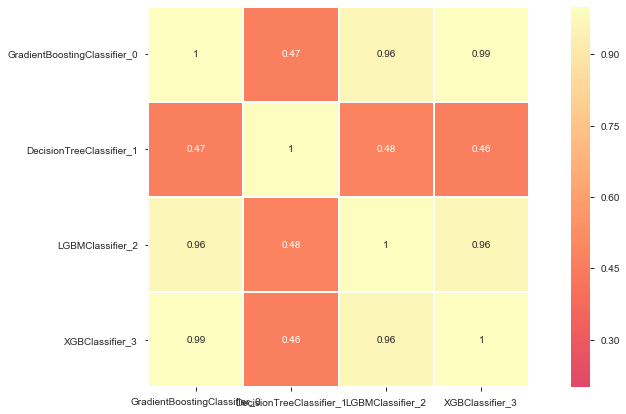

In [28]:
stack_soft_plot = stack_models([gbc,dt,lightgbm,xgboost], plot=True)

Before we wrap up this section, there is another parameter in `stack_models()` that we haven't seen yet i.e. `restack` parameter when is set to True by default. 

# 11.0 Model Calibration

When performing classification you often want not only to predict the class label (outcome such as 0 or 1), but also obtain a probability of the respective outcome. This probability gives you some kind of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some even do not support probability prediction. Well calibrated classifiers are probabilistic classifiers for which the output in form of probabilities can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through `calibrate_model()` function. See an example below:

In [29]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8202  0.7370  0.3541  0.6793  0.4655  0.3701
1       0.8114  0.7464  0.3116  0.6548  0.4223  0.3261
2       0.8102  0.7508  0.3598  0.6225  0.4560  0.3508
3       0.8039  0.7311  0.3088  0.6124  0.4105  0.3079
4       0.8089  0.7130  0.3314  0.6290  0.4341  0.3322
5       0.8120  0.7345  0.3229  0.6514  0.4318  0.3342
6       0.8033  0.7314  0.3314  0.6000  0.4270  0.3200
7       0.8033  0.7506  0.3229  0.6032  0.4207  0.3150
8       0.8114  0.7231  0.3371  0.6398  0.4416  0.3410
9       0.8063  0.7323  0.3456  0.6100  0.4412  0.3347
Mean    0.8091  0.7350  0.3326  0.6302  0.4351  0.3332
SD      0.0050  0.0113  0.0161  0.0245  0.0158  0.0171

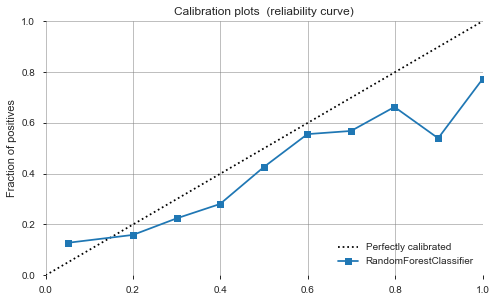

In [30]:
plot_model(rf, plot='calibration')

In [31]:
calibrated_rf = calibrate_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8189  0.7708  0.2720  0.7500  0.3992  0.3190
1       0.8170  0.7766  0.2833  0.7194  0.4065  0.3217
2       0.8164  0.8062  0.2691  0.7308  0.3934  0.3114
3       0.8127  0.7448  0.2776  0.6901  0.3960  0.3082
4       0.8127  0.7580  0.2776  0.6901  0.3960  0.3082
5       0.8152  0.7830  0.2720  0.7164  0.3943  0.3103
6       0.8152  0.7495  0.2890  0.6986  0.4088  0.3209
7       0.8202  0.7882  0.2635  0.7750  0.3932  0.3165
8       0.8152  0.7590  0.2833  0.7042  0.4040  0.3174
9       0.8113  0.7701  0.2720  0.6857  0.3895  0.3017
Mean    0.8155  0.7706  0.2759  0.7160  0.3981  0.3135
SD      0.0027  0.0178  0.0073  0.0275  0.0061  0.0062

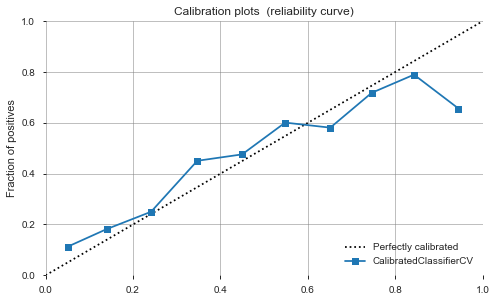

In [32]:
plot_model(calibrated_rf, plot='calibration')

Notice that how different the above 2 plots look, one is before calibration and one is after. A perfectly calibrated classifier will follow the black dotted line in above plots. Not only `calibrated_rf` is better calibrated but if you notice that `AUC` has also improved from `0.7350` to `0.7706`. By default `calibrate_model()` uses `sigmoid` method which corresponds to Platt's approach. The other available method is `isotonic` which is a non-parametric approach. See an example of calibration using `isotonic` method below:  

In [33]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8202  0.7681  0.2946  0.7324  0.4202  0.3359
1       0.8195  0.7768  0.3003  0.7211  0.4240  0.3379
2       0.8177  0.8048  0.2861  0.7214  0.4097  0.3249
3       0.8139  0.7448  0.3003  0.6795  0.4165  0.3250
4       0.8170  0.7583  0.2918  0.7103  0.4137  0.3270
5       0.8170  0.7803  0.2918  0.7103  0.4137  0.3270
6       0.8152  0.7482  0.3031  0.6859  0.4204  0.3295
7       0.8239  0.7890  0.2890  0.7727  0.4206  0.3413
8       0.8158  0.7602  0.2890  0.7034  0.4096  0.3224
9       0.8113  0.7692  0.2890  0.6711  0.4040  0.3123
Mean    0.8172  0.7700  0.2935  0.7108  0.4152  0.3283
SD      0.0033  0.0175  0.0056  0.0278  0.0059  0.0080

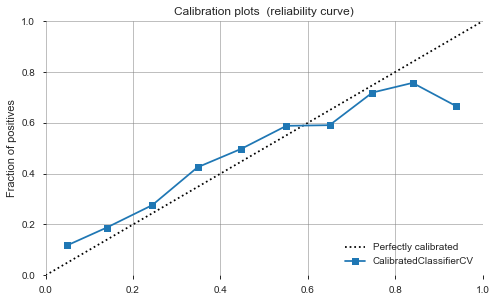

In [34]:
plot_model(calibrated_rf_isotonic, plot='calibration')

# 11.0 Predict on test / hold-out Sample

In section 10.4 above we have discussed that stacking is less commonly implemented technique of ensembling due to practical difficulties. To understand this more Let's imagine a scenario that the model deployed in production is stacking ensembler of 4 models plus a meta model (similar to `stack_soft` created in section 10.4 above). To generate a prediction on unseen dataset, every data point has to be predicted by all the 4 models of stacking ensembler and then all these prediction has to pass through meta-model to generate a final prediction. As the size of your stacking ensembler increases, it becomes code intensive and hard to maintain and use in production.

In  __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we have seen how to use a trained model to generate prediction on test / hold-out or unseen dataset. In this example we will see it is no different to generate predictions using stacking ensembler in PyCaret. For the purpose of illustration, we will use `stack_soft` created in section 10.4 above for remaining part of this tutorial.

In [35]:
predict_model(stack_soft);

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Stacking Classifier    0.8146  0.7566   0.341  0.6557  0.4487  0.3504

Accuracy on hold-out sample is **`0.8146`** compared with CV results of **`0.8216`** in section 10.4 above. However, note that there is a significant decline in `AUC` on hold-out set from CV. We will discuss the reasons and how to investigate this in our next tutorial.  __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF103)_LevelExpert.ipynb)__. For now we will finish the remaining part of this tutorial using stacking ensembler stored in `stack_soft` variable.

# 12.0 Finalize Model for Deployment

In __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we have learned the purpose of `finalize_model()` and how to do it. In this tutorial we will finalize stacking ensembler and it is no different than finalizing a single model.

In [36]:
final_stack_soft = finalize_model(stack_soft)

# 13.0 Predict on unseen data

We will now use `final_stack_soft` to generate predictions on `data_unseen` that was created in the beginning and it contains 5% (1200 samples) of the original dataset that was never exposed to PyCaret. (see section 5 for explanations)

In [37]:
unseen_predictions = predict_model(final_stack_soft, data=data_unseen)
unseen_predictions.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         1   48      0      0      0      0   
1     200000    2          1         1   40      2      2      2      2   
2      50000    2          3         1   44      1      2      3      2   
3      60000    2          2         1   31      2      2     -1      0   
4     120000    2          3         2   32     -1      0      0      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...     8011.0    2028.0    2453.0    2329.0     431.0     300.0   
1      2  ...    89112.0    4200.0    4100.0    3000.0    3400.0    3500.0   
2      4  ...    15798.0    2100.0    1000.0    2300.0       0.0       0.0   
3      0  ...    30384.0    1132.0   60994.0    1436.0    1047.0    1056.0   
4      0  ...    81354.0    2429.0    3120.0    3300.0   10000.0    3200.0   

   PAY_AMT6  default  Label   Score  
0     500.0        0      0  0.1770  
1       0.0        1      1  0.7896  
2       0.0        1      1  0.6457  
3    1053.0        1      1  0.5704  
4    3200.0        0      0  0.1386  

[5 rows x 26 columns]

Notice the last two columns 'Label' and 'Score'. Label is the prediction and score is the probability of prediction. Notice that predicted results are concated to the original dataset while all the transformations including imputation of missing values (in this case None), categorical encoding, feature extraction etc. is performed under the hood and you dont have to manage the pipeline manually. All this is done automatically in PyCaret.

# 14.0 Save the experiment

In __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF101)_LevelBeginner.ipynb)__ we have learned how to save and load the model. In this experiment we will learn how to save the entire experiment including all the outputs and models we have built in this experiment. Saving experiment is as simple as saving model.

In [38]:
save_experiment('Experiment_123 08Feb2020')

Experiment Succesfully Saved


# 15.0 Loading saved experiment

To load a saved experiment on a future date or in a different environment, we would use the `load_experiment()` function.

In [39]:
saved_experiment = load_experiment('Experiment_123 08Feb2020')

Object
0                     Classification Setup Config
1                                  X_training Set
2                                  y_training Set
3                                      X_test Set
4                                      y_test Set
5                         Transformation Pipeline
6                       Compare Models Score Grid
7                                   Decision Tree
8                        Decision Tree Score Grid
9                                   Decision Tree
10                       Decision Tree Score Grid
11                   Tuned RandomForestClassifier
12        Tuned RandomForestClassifier Score Grid
13                   Tuned RandomForestClassifier
14        Tuned RandomForestClassifier Score Grid
15                                  Decision Tree
16                       Decision Tree Score Grid
17                              BaggingClassifier
18                   BaggingClassifier Score Grid
19                             AdaBoostClassifier
20                  AdaBoostClassifier Score Grid
21                              BaggingClassifier
22                   BaggingClassifier Score Grid
23                        Tuned BaggingClassifier
24             Tuned BaggingClassifier Score Grid
25                              Voting Classifier
26                   Voting Classifier Score Grid
27                              Voting Classifier
28                   Voting Classifier Score Grid
29                   Gradient Boosting Classifier
30        Gradient Boosting Classifier Score Grid
31                                  Decision Tree
32                       Decision Tree Score Grid
33                Light Gradient Boosting Machine
34     Light Gradient Boosting Machine Score Grid
35                      Extreme Gradient Boosting
36           Extreme Gradient Boosting Score Grid
37                              Voting Classifier
38                   Voting Classifier Score Grid
39                              Voting Classifier
40                   Voting Classifier Score Grid
41             Stacking Classifier (Single Layer)
42  Stacking Classifier (Single Layer) Score Grid
43             Stacking Classifier (Single Layer)
44  Stacking Classifier (Single Layer) Score Grid
45             Stacking Classifier (Single Layer)
46  Stacking Classifier (Single Layer) Score Grid
47             Stacking Classifier (Single Layer)
48  Stacking Classifier (Single Layer) Score Grid
49                       Random Forest Classifier
50            Random Forest Classifier Score Grid
51                         CalibratedClassifierCV
52              CalibratedClassifierCV Score Grid
53                         CalibratedClassifierCV
54              CalibratedClassifierCV Score Grid
55             Stacking Classifier (Single Layer)
56  Stacking Classifier (Single Layer) Score Grid
57              Final [GradientBoostingClassifier

Notice that when you used `load_experiment()`, it has loaded the entire experiments and all the intermediate outputs in variable `saved_experiment`. You can access specific items in a similar way you would access list elements in Python. See example below in which we are accessing our final stacking ensembler and store it in `final_stack_soft_loaded` variable.

In [40]:
final_stack_soft_loaded = saved_experiment[57]

In [41]:
new_prediction = predict_model(final_stack_soft_loaded, data=data_unseen)
new_prediction.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         1   48      0      0      0      0   
1     200000    2          1         1   40      2      2      2      2   
2      50000    2          3         1   44      1      2      3      2   
3      60000    2          2         1   31      2      2     -1      0   
4     120000    2          3         2   32     -1      0      0      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...     8011.0    2028.0    2453.0    2329.0     431.0     300.0   
1      2  ...    89112.0    4200.0    4100.0    3000.0    3400.0    3500.0   
2      4  ...    15798.0    2100.0    1000.0    2300.0       0.0       0.0   
3      0  ...    30384.0    1132.0   60994.0    1436.0    1047.0    1056.0   
4      0  ...    81354.0    2429.0    3120.0    3300.0   10000.0    3200.0   

   PAY_AMT6  default  Label   Score  
0     500.0        0      0  0.1770  
1       0.0        1      1  0.7896  
2       0.0        1      1  0.6457  
3    1053.0        1      1  0.5704  
4    3200.0        0      0  0.1386  

[5 rows x 26 columns]

Notice that results of `unseen_predictions` and `new_prediction` are identical.

# 16.0 Wrap-up / Next Steps?

We have covered a lot of new concepts in this tutorial. Most importantly, we have seen how to use Exploratory Data Analysis in customizing the pipeline in `setup()` that has improved the results considerably comparing to what we have seen earlier in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20(CLF101)%20-%20Level%20Beginner.ipynb)__. We have also learned how to perform and tune ensembling in PyCaret.

In this tutorial, we have covered many significant concepts and how to perform them using `pycaret.classification`. However, there are still few more things to go such as defining and optimizing custom cost function, interpretating more complex tree based models using shapley values, advance ensembling techniques such as multiple layer stacknet and more in pre-processing pipelines. We will cover all this in our next and final tutorial of the `pycaret.classification` series. 

See you at the next tutorial. Follow the link to __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/BinaryClassificationTutorial(CLF103)_LevelExpert.ipynb)__